# Tests

chi-squared etc.

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

plt.style.use('seaborn')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

import gspread
from oauth2client.service_account import ServiceAccountCredentials

gc = gspread.service_account(filename='credentials.json')
gsheet = gc.open_by_key('1svWmmaMlgArXB-xYvyDbQLzQB7mDYcnbrhIknNa0uaA')

log = gsheet.get_worksheet_by_id(1136380323)

def custom_int_parse(cell: gspread.Cell):
    value = cell.value
    try:
        return int(value)
    except ValueError:
        return np.nan

def nan_to_0(val: int):
    if np.isnan(val):
        return 0
    else:
        return val

def int_wrapper(val: any):
    return int(val)

indices9 = np.array(list(map(custom_int_parse, log.range('A3:A32'))))
names9 = np.array(list(map(lambda cell: cell.value, log.range('B3:B32'))))
choices9 = np.array(list(map(custom_int_parse, log.range('C3:C32'))))

freqs9 = pd.Series(choices9).value_counts().sort_index()
freqs9['no_response'] = len(choices9) - freqs9.sum()

data9 = np.array([indices9, names9, choices9]).T
df9 = pd.DataFrame(data9, columns=['Index', 'Name', 'Choice'])

indices10 = np.array(list(map(custom_int_parse, log.range('D3:D32'))))
names10 = np.array(list(map(lambda cell: cell.value, log.range('E3:E32'))))
choices10 = np.array(list(map(custom_int_parse, log.range('F3:F32'))))

freqs10 = pd.Series(choices10).value_counts().sort_index()
freqs10['no_response'] = len(choices10) - freqs10.sum()

data10 = np.array([indices10, names10, choices10]).T
df10 = pd.DataFrame(data10, columns=['Index', 'Name', 'Choice'])

indices11 = np.array(list(map(custom_int_parse, log.range('G3:G32'))))
names11 = np.array(list(map(lambda cell: cell.value, log.range('H3:H32'))))
choices11 = np.array(list(map(custom_int_parse, log.range('I3:I32'))))

freqs11 = pd.Series(choices11).value_counts().sort_index()
freqs11['no_response'] = len(choices11) - freqs11.sum()

data11 = np.array([indices11, names11, choices11]).T
df11 = pd.DataFrame(data11, columns=['Index', 'Name', 'Choice'])

indices12 = np.array(list(map(custom_int_parse, log.range('J3:J32'))))
names12 = np.array(list(map(lambda cell: cell.value, log.range('K3:K32'))))
choices12 = np.array(list(map(custom_int_parse, log.range('L3:L32'))))

freqs12 = pd.Series(choices12).value_counts().sort_index()
freqs12['no_response'] = len(choices12) - freqs12.sum()

data12 = np.array([indices12, names12, choices12]).T
df12 = pd.DataFrame(data12, columns=['Index', 'Name', 'Choice'])

dflog = pd.concat([df9, df10, df11, df12], axis=1)
dflog.columns = pd.MultiIndex.from_product([['9th', '10th', '11th', '12th'], ['Index', 'Name', 'Choice']])

dfcounts = pd.concat([freqs9, freqs10, freqs11, freqs12], axis=1)
dfcounts.columns = ['9th', '10th', '11th', '12th']
dfcounts.set_index(pd.Index([str(i) for i in range(1, 11)]).append(pd.Index(['no_response'])), inplace=True)
dfcounts.fillna(0, inplace=True)
dfcounts = dfcounts.applymap(int_wrapper)
dfcounts['Total'] = dfcounts.sum(axis=1)

display(dfcounts)

dfcounts_raw = dfcounts.copy().drop('Total', axis = 1).drop('no_response', axis = 0)

gof_chisq, gof_pval = stats.chisquare(dfcounts['Total'].drop('no_response'))
print(f'gof_chisq: {gof_chisq}')
print(f'gof_pval: {gof_pval}')

indep_chisq, indep_pval, indep_dof, indep_expected = stats.chi2_contingency(dfcounts_raw.values)
print(f'indep_chisq: {indep_chisq}')
print(f'indep_pval: {indep_pval}')

,9th,10th,11th,12th,Total
1,2,1,3,0,6
2,1,3,2,3,9
3,2,2,0,7,11
4,2,2,6,1,11
5,1,2,1,0,4
6,4,4,1,4,13
7,6,3,4,4,17
8,3,4,5,1,13
9,1,3,3,1,8
10,1,5,0,2,8


gof_chisq: 13.000000000000002
gof_pval: 0.16260626219029933
indep_chisq: 35.97301760473116
indep_pval: 0.11588966918108724


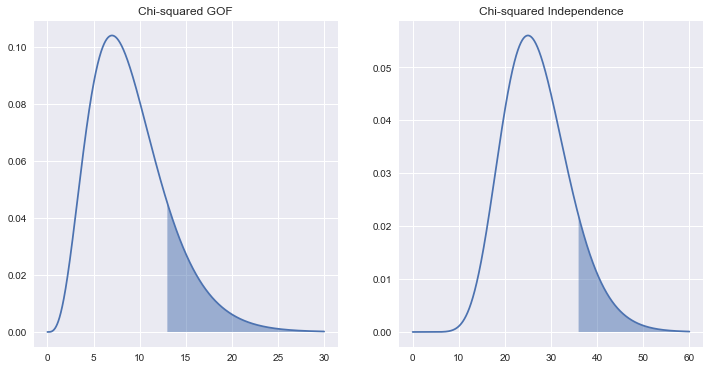

In [107]:
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.patch.set_facecolor('white')

x1 = np.arange(0, 30, 0.01)
ax1.plot(x1, stats.chi2.pdf(x1, df = 9))
ax1.set_title('Chi-squared GOF')
ax1.fill_between(x1, stats.chi2.pdf(x1, df = 9), where=(x1 >= 13), alpha = 0.5)

x2 = np.arange(0, 60, 0.01)
ax2.plot(x2, stats.chi2.pdf(x2, df = 27))
ax2.set_title('Chi-squared Independence')
ax2.fill_between(x2, stats.chi2.pdf(x2, df = 27), where=(x2 >= 35.9730), alpha = 0.5)

plt.show()